In [41]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

In [3]:
# downloading twitter sample dataset
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/sanket.p/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [5]:
# selecting the set of positive and negative tweets
all_pos_tweets = twitter_samples.strings('positive_tweets.json')
all_neg_tweets = twitter_samples.strings('negative_tweets.json')

In [6]:
len(all_pos_tweets), len(all_neg_tweets)

(5000, 5000)

In [15]:
print('Positive_tweet Sample: \n', all_pos_tweets[random.randint(0,500)])
print('Negativev_tweet Sample: \n', all_neg_tweets[random.randint(0,500)])


Positive_tweet Sample: 
 @concertina226 Haha that's great :)
Negativev_tweet Sample: 
 @eydiespi there is no surprise :(


# PREPROCESSING

In [22]:
sample_tweet = all_pos_tweets[random.randint(0,500)]
sample_tweet

'@BhaktisBanter @PallaviRuhail yeah! This is fun :) #FlipkartFashionFriday'

In [18]:
# Removing stopwords

# downloading vocab of stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanket.p/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
import re # for regular expression operations
import string # for string operations

from nltk.corpus import stopwords # module for stop words that come with NLTK
from nltk.stem import PorterStemmer # module for stemming
from nltk.tokenize import TweetTokenizer # module for tokenizing

In [30]:
def text_cleaning(tweet):
    
    # removing old stype retweet text "RT"
    tweet_cleaned = re.sub(r'^RT[\s]+', '', tweet)
    
    # removing hyper links
    tweet_cleaned = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet_cleaned)
    
    # remove hashtags (only removing # signs)
    tweet_cleaned = re.sub(r'#', '', tweet_cleaned)
    
    return tweet_cleaned

cleaned_tweet = text_cleaning(sample_tweet)

print('Sample Tweet:\n', sample_tweet)
print('Cleaned sample Tweet:\n', cleaned_tweet)


Sample Tweet:
 @BhaktisBanter @PallaviRuhail yeah! This is fun :) #FlipkartFashionFriday
Cleaned sample Tweet:
 @BhaktisBanter @PallaviRuhail yeah! This is fun :) FlipkartFashionFriday


In [31]:
def tokenize_string(cleaned_tweet):
    
    # instantiate tokenizer class
    tokenizer = TweetTokenizer(preserve_case = False,
                              strip_handles = True,
                              reduce_len = True)
    
    tweet_tokens = tokenizer.tokenize(cleaned_tweet)
    
    return tweet_tokens

print()
tweet_tokens_ = tokenize_string(cleaned_tweet)
print('Tokenized string:\n', tweet_tokens_)


Tokenized string:
 ['yeah', '!', 'this', 'is', 'fun', ':)', 'flipkartfashionfriday']


In [33]:
# Remove stopwords and punctuations

stopwords_english = stopwords.words('english')

def remove_stopwords(tweet_tokens):
    
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and 
            word not in string.punctuation):
            tweets_clean.append(word)
            
    return tweets_clean
        
    
print()
tweet_tokens_ = remove_stopwords(tweet_tokens)
print('Tokenized string After stopwords removed:\n', tweet_tokens_)



Tokenized string After stopwords removed:
 ['yeah', 'fun', ':)', 'flipkartfashionfriday']


In [34]:
# Applying stemming and lemmatization

# Instatiating stemming class from NLTK
stemmer = PorterStemmer()

def stemming_text(tokenized_string):
    
    tweets_stem = []
    for word in tokenized_string:
        stem_word = stemmer.stem(word)
        tweets_stem.append(stem_word)
        
    return tweets_stem

print()
stemmed_tweet = stemming_text(tweet_tokens_)
print('Stemmed tokenized string:\n', stemmed_tweet)


Stemmed tokenized string:
 ['yeah', 'fun', ':)', 'flipkartfashionfriday']


In [48]:
def process_tweet(tweet):
    """ Merging all preprocessing methods"""
    
    cleaned_text = text_cleaning(tweet)
    tokenized_text = tokenize_string(cleaned_text)
    stopwords_removed_tokens = remove_stopwords(tokenized_text)
    stemmed_tokens = stemming_text(stopwords_removed_tokens)
    
    return stemmed_tokens

# Creating Word Freq Dictionary

In [43]:
# Creating data frame with labels tagged for each tweet

tweets = all_pos_tweets + all_neg_tweets
labels = np.append(np.ones((len(all_pos_tweets))), np.zeros((len(all_neg_tweets))) )

tweets_df = pd.DataFrame()
tweets_df['tweet'] = pd.Series(tweets)
tweets_df['label'] = pd.Series(labels)

display(tweets_df)

,tweet,label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1.0
1,@Lamb2ja Hey James! How odd :/ Please call our...,1.0
2,@DespiteOfficial we had a listen last night :)...,1.0
3,@97sides CONGRATS :),1.0
4,yeaaaah yippppy!!! my accnt verified rqst has...,1.0
...,...,...
9995,I wanna change my avi but uSanele :(,0.0
9996,MY PUPPY BROKE HER FOOT :(,0.0
9997,where's all the jaebum baby pictures :((,0.0
9998,But but Mr Ahmad Maslan cooks too :( https://t...,0.0


In [49]:
def build_freqs(tweets, ys):
    """ Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m * 1 array with sentiment label of each tweet
        
    Output:
        freqs: a dict mapping each (word, sentiment) pair to its frequency
    
    """
    # Converting np array to list since zip needs iterable
    ys_list = np.squeeze(ys).tolist()
    
    freqs = {}
    for y, tweet in zip(ys_list, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs

In [50]:
# creating freq dictionary
freqs = build_freqs(tweets, labels)
# freqs

{('followfriday', 1.0): 25,
 ('top', 1.0): 32,
 ('engag', 1.0): 7,
 ('member', 1.0): 16,
 ('commun', 1.0): 33,
 ('week', 1.0): 83,
 (':)', 1.0): 3568,
 ('hey', 1.0): 76,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 97,
 ('call', 1.0): 37,
 ('contact', 1.0): 7,
 ('centr', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 ('assist', 1.0): 1,
 ('mani', 1.0): 33,
 ('thank', 1.0): 620,
 ('listen', 1.0): 16,
 ('last', 1.0): 47,
 ('night', 1.0): 68,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 51,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profil', 1.0): 2,
 ('15', 1.0): 5,
 ('day', 1.0): 246,
 ('one', 1.0): 129,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('like', 1.0): 233,
 ('keep', 1.0): 68,
 ('love', 1.0): 400,


In [68]:
# Creating Table of Word Counts

def build_word_count_table(tweets, freqs):
    """ Building word count table with freq of word in pos & -ve sentiment category """
    
    word_list = []
    data = []
    
    # creating list of words in processed tweet corpus
    for tweet in tweets:
        processed_tweet = process_tweet(tweet)
        word_list.append(processed_tweet)
    
    
    for word in sum(word_list,[]):
        
        # initialize pos and neg counts
        pos = 0
        neg = 0
        
#         print(word)
        # retrieve number of pos counts
        if (word, 1) in freqs:
            pos = freqs[(word,1)]
            
        # retrieve number of neg counts
        if (word, 0) in freqs:
            neg = freqs[(word, 0)]
            
        # append the word counts to the table
        data.append([word, pos, neg])
        
    return data

data_table = build_word_count_table(tweets, freqs)
            
data_table         

[['followfriday', 25, 0],
 ['top', 32, 6],
 ['engag', 7, 0],
 ['member', 16, 6],
 ['commun', 33, 2],
 ['week', 83, 56],
 [':)', 3568, 2],
 ['hey', 76, 26],
 ['jame', 7, 4],
 ['odd', 2, 3],
 [':/', 5, 11],
 ['pleas', 97, 275],
 ['call', 37, 29],
 ['contact', 7, 7],
 ['centr', 2, 2],
 ['02392441234', 1, 0],
 ['abl', 8, 22],
 ['assist', 1, 0],
 [':)', 3568, 2],
 ['mani', 33, 29],
 ['thank', 620, 107],
 ['listen', 16, 18],
 ['last', 47, 72],
 ['night', 68, 46],
 [':)', 3568, 2],
 ['bleed', 2, 1],
 ['amaz', 51, 16],
 ['track', 5, 3],
 ['scotland', 2, 2],
 ['congrat', 21, 2],
 [':)', 3568, 2],
 ['yeaaah', 1, 0],
 ['yipppi', 1, 0],
 ['accnt', 2, 0],
 ['verifi', 2, 0],
 ['rqst', 1, 0],
 ['succeed', 1, 0],
 ['got', 69, 104],
 ['blue', 9, 5],
 ['tick', 1, 0],
 ['mark', 1, 2],
 ['fb', 6, 7],
 ['profil', 2, 1],
 [':)', 3568, 2],
 ['15', 5, 10],
 ['day', 246, 149],
 ['one', 129, 148],
 ['irresist', 2, 0],
 [':)', 3568, 2],
 ['flipkartfashionfriday', 17, 0],
 ['like', 233, 228],
 ['keep', 68, 34],
 

**Using scatter plot to inspect this table visually.**

Instead of plotting the raw counts, we will plot it in the logarithmic scale to take into account the wide discrepancies between the raw counts (e.g. `:)` has 3568 counts in the positive while only 2 in the negative). The red line marks the boundary between positive and negative areas. Words close to the red line can be classified as neutral. 

In [79]:
# Selecting random words from data_tables to plot
random_data_table = random.sample(data_table,50)
random_data_table

[['🙌', 1, 0],
 [':d', 629, 0],
 ['look', 137, 100],
 ['never', 36, 57],
 ['unfortun', 2, 21],
 ['would', 84, 70],
 ['felic', 1, 0],
 ['dishoom', 2, 0],
 ['next', 48, 40],
 [':)', 3568, 2],
 ['thank', 620, 107],
 ['follow', 381, 262],
 ['get', 206, 232],
 [':(', 1, 4571],
 [':)', 3568, 2],
 ['sad', 5, 123],
 ['seen', 10, 23],
 ['procedur', 1, 0],
 ['guy', 60, 62],
 ['though', 19, 57],
 [':-)', 692, 0],
 [':)', 3568, 2],
 ['nofx', 1, 0],
 ['member', 16, 6],
 ['love', 400, 152],
 ['thank', 620, 107],
 ["that'", 67, 61],
 ['》', 0, 210],
 ['say', 61, 63],
 [':d', 629, 0],
 ['fix', 10, 10],
 ['honestli', 3, 4],
 ['1', 75, 26],
 ['jurass', 1, 0],
 ['market', 5, 2],
 [':)', 3568, 2],
 ['soft', 2, 1],
 ['thing', 69, 52],
 ['address', 10, 3],
 ['shi', 0, 1],
 ['pant', 1, 3],
 [':(', 1, 4571],
 ['time', 127, 166],
 [':(', 1, 4571],
 ['reservations@sandsbeach.eu', 1, 0],
 ['ij', 0, 1],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['world', 27, 17],
 ['realreview', 1, 0]]

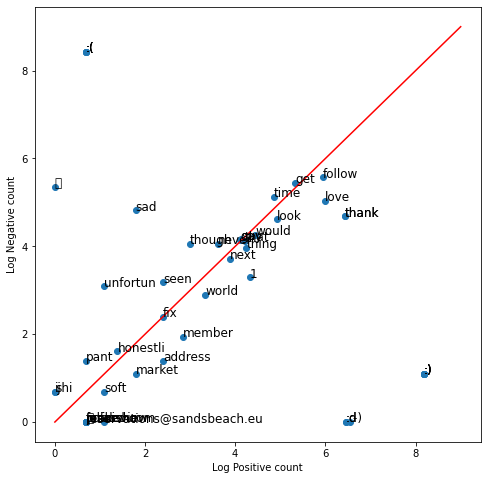

In [80]:
fig, ax = plt.subplots(figsize = (8, 8))

# Convert pos raw counts to log scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in random_data_table])

# do the same for the neg counts
y = np.log([x[2] + 1 for x in random_data_table ])

# plot the dot for each pair of words
ax.scatter(x, y)

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Adding corresponding word at the same position of its points
for i in range(0, len(random_data_table )):
    ax.annotate(random_data_table [i][0], (x[i], y[i]), fontsize=12)
    
ax.plot([0, 9], [0, 9], color = 'red')
plt.show()

# Visualising Tweets and Logistic Regression Model

In [91]:
# Splitting data into train and test
test_pos = all_pos_tweets[4000:]
train_pos = all_pos_tweets[:4000]
test_neg = all_neg_tweets[4000:]
train_neg = all_neg_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [92]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [82]:
np.zeros((1,3))

array([[0., 0., 0.]])

In [83]:
# Extracting features

def extract_features(tweet, freqs):
    """
    Input:
        tweet: a list of words for one tweet
        freqs: a dict corresponding to freq of each tuple
    Output:
        x: a feature vector of dimension (1,3)
    """
    
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 element in the form of 1 x 3 vector
    x = np.zeros((1,3))
    
    # bias term is set to 1 
    x[0,0] = 1 
    
    for word in word_l:
        
        # increment the word count for +ve lable 1
        x[0,1] += freqs.get((word,1.0),0)
        
        # increment the word count for -ve label 0 
        x[0,2] += freqs.get((word, 0.0), 0)
        
    assert(x.shape == (1,3))
    return x

In [85]:
train_x[0]

'#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)'

In [84]:
temp1 = extract_features(train_x[0], freqs)
temp1

array([[1.000e+00, 3.764e+03, 7.200e+01]])

In [86]:
# test 2 when the words not in freqs dict
temp2 = extract_features('blorb bleeeeb bloooob', freqs)
temp2

array([[1., 0., 0.]])

In [93]:
# Collecting the features 'x' and stacking them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :] = extract_features(train_x[i], freqs)

# Labels corresponding to each X
Y = train_y

### Logistic regression: regression and a sigmoid

Logistic regression takes a regular linear regression, and applies a sigmoid to the output of the linear regression.

Regression:
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
Note that the $\theta$ values are "weights".  

Logistic regression
$$ h(z) = \frac{1}{1+\exp^{-z}}$$
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
We will refer to 'z' as the 'logits'.

### Part 1.2 Cost function and Gradient

The cost function used for logistic regression is the average of the log loss across all training examples:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)}))\tag{5} $$
* $m$ is the number of training examples
* $y^{(i)}$ is the actual label of the i-th training example.
* $h(z(\theta)^{(i)})$ is the model's prediction for the i-th training example.

The loss function for a single training example is
$$ Loss = -1 \times \left( y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) \right)$$

* All the $h$ values are between 0 and 1, so the logs will be negative. That is the reason for the factor of -1 applied to the sum of the two loss terms.
* Note that when the model predicts 1 ($h(z(\theta)) = 1$) and the label $y$ is also 1, the loss for that training example is 0. 
* Similarly, when the model predicts 0 ($h(z(\theta)) = 0$) and the actual label is also 0, the loss for that training example is 0. 
* However, when the model prediction is close to 1 ($h(z(\theta)) = 0.9999$) and the label is 0, the second term of the log loss becomes a large negative number, which is then multiplied by the overall factor of -1 to convert it to a positive loss value. $-1 \times (1 - 0) \times log(1 - 0.9999) \approx 9.2$ The closer the model prediction gets to 1, the larger the loss.

#### Update the weights

To update your weight vector $\theta$, you will apply gradient descent to iteratively improve your model's predictions.  
The gradient of the cost function $J$ with respect to one of the weights $\theta_j$ is:

$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x_j \tag{5}$$
* 'i' is the index across all 'm' training examples.
* 'j' is the index of the weight $\theta_j$, so $x_j$ is the feature associated with weight $\theta_j$

* To update the weight $\theta_j$, we adjust it by subtracting a fraction of the gradient determined by $\alpha$:
$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$
* The learning rate $\alpha$ is a value that we choose to control how big a single update will be.


## Instructions: Implement gradient descent function
* The number of iterations `num_iters` is the number of times that you'll use the entire training set.
* For each iteration, you'll calculate the cost function using all training examples (there are `m` training examples), and for all features.
* Instead of updating a single weight $\theta_i$ at a time, we can update all the weights in the column vector:  
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_n
\end{pmatrix}$$
* $\mathbf{\theta}$ has dimensions (n+1, 1), where 'n' is the number of features, and there is one more element for the bias term $\theta_0$ (note that the corresponding feature value $\mathbf{x_0}$ is 1).
* The 'logits', 'z', are calculated by multiplying the feature matrix 'x' with the weight vector 'theta'.  $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ has dimensions (m, n+1) 
    * $\mathbf{\theta}$: has dimensions (n+1, 1)
    * $\mathbf{z}$: has dimensions (m, 1)
* The prediction 'h', is calculated by applying the sigmoid to each element in 'z': $h(z) = sigmoid(z)$, and has dimensions (m,1).
* The cost function $J$ is calculated by taking the dot product of the vectors 'y' and 'log(h)'.  Since both 'y' and 'h' are column vectors (m,1), transpose the vector to the left, so that matrix multiplication of a row vector with column vector performs the dot product.
$$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$
* The update of theta is also vectorized.  Because the dimensions of $\mathbf{x}$ are (m, n+1), and both $\mathbf{h}$ and $\mathbf{y}$ are (m, 1), we need to transpose the $\mathbf{x}$ and place it on the left in order to perform matrix multiplication, which then yields the (n+1, 1) answer we need:
$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$

In [97]:
def sigmoid(z):
    ''' 
    Input:
         z: input (can be scalar or array)
    output:
         h: sigmoid of z
    '''
    h = 1 / (1 + np.exp(-z))
    
    return h

In [98]:
def gradientDescent(x, y, theta, alpha, num_iters):
    """ 
    Input:
        x: matrix of features which is (m, n+1)
        y: corresponding labels of input matrix x, dimension (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iter: num of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight factor
    
    """
    m = x.shape[0]
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x, theta)
        
        # get the sigmoid
        h = sigmoid(z)
        
        # calculate cost function
        J = (-1.0/m) * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(), np.log(1-h)))
        
        # update the weights theta
        theta = theta - (alpha/m) * np.dot(x.transpose(), (h-y))
        
    J = float(J)
    return J, theta

In [99]:
# Applying gradient Descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.19513844.
The resulting vector of weights is [7e-08, 0.00054223, -0.00054312]




#### Instructions: Write `predict_tweet`
Predict whether a tweet is positive or negative.

* Given a tweet, process it, then extract the features.
* Apply the model's learned weights on the features to get the logits.
* Apply the sigmoid to the logits to get the prediction (a value between 0 and 1).

$$y_{pred} = sigmoid(\mathbf{x} \cdot \theta)$$

In [100]:
def predict_tweet(tweet, freqs, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dict corresponding to freq of each tuple
        theta: (3,1) vector of weights
    Output:
        y_pred: the prob of a tweet being pos or neg
    '''
    
    x = extract_features(tweet, freqs)
    
    # making pred using x and theta
    y_pred = sigmoid(np.dot(x, theta))
    
    return y_pred

In [101]:
# Run this cell to test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

I am happy -> 0.525187
I am bad -> 0.492529
this movie should have been great. -> 0.520177
great -> 0.520182
great great -> 0.540299
great great great -> 0.560285
great great great great -> 0.580078


In [102]:
def test_logistic_regression(test_x, test_y, freqs, theta):
    '''
    Input:
        test_x: a list of tweets
        test_y: (m, 1) vector with corresponding labels for the list of tweets
        freqs: a dict with freq of each pair
        theata: weight vector 
    Output:
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    '''
    
    y_hat = []
    
    for tweet in test_x:
        # getting label pred for tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
            
        else:
            # append 0.0 to the list
            y_hat.append(0)
            
            
    accuracy = (y_hat == np.squeeze(test_y)).sum()/len(test_x)
    
    return accuracy

In [103]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9965


In [104]:
# Feel free to change the tweet below
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.47922586]]
Negative sentiment


In [ ]:
# Some error analysis done for you
print('Truth Predicted Tweet')
for x, y in zip(test_x, test_y):
    y_hat = naive_bayes_predict(x, logprior, loglikelihood)
    if y != (np.sign(y_hat) > 0):
        print('%d\t%0.2f\t%s' % (y, np.sign(y_hat) > 0, ' '.join(
            process_tweet(x)).encode('ascii', 'ignore')))

# Visualizing and Implementing Naive Bayes

#### Instructions
Given a freqs dictionary, `train_x` (a list of tweets) and a `train_y` (a list of labels for each tweet), implement a naive bayes classifier.

##### Calculate $V$
- You can then compute the number of unique words that appear in the `freqs` dictionary to get your $V$ (you can use the `set` function).

##### Calculate $freq_{pos}$ and $freq_{neg}$
- Using your `freqs` dictionary, you can compute the positive and negative frequency of each word $freq_{pos}$ and $freq_{neg}$.

##### Calculate $N_{pos}$ and $N_{neg}$
- Using `freqs` dictionary, you can also compute the total number of positive words and total number of negative words $N_{pos}$ and $N_{neg}$.

##### Calculate $D$, $D_{pos}$, $D_{neg}$
- Using the `train_y` input list of labels, calculate the number of documents (tweets) $D$, as well as the number of positive documents (tweets) $D_{pos}$ and number of negative documents (tweets) $D_{neg}$.
- Calculate the probability that a document (tweet) is positive $P(D_{pos})$, and the probability that a document (tweet) is negative $P(D_{neg})$

##### Calculate the logprior
- the logprior is $log(D_{pos}) - log(D_{neg})$

##### Calculate log likelihood
- Finally, you can iterate over each word in the vocabulary, use your `lookup` function to get the positive frequencies, $freq_{pos}$, and the negative frequencies, $freq_{neg}$, for that specific word.
- Compute the positive probability of each word $P(W_{pos})$, negative probability of each word $P(W_{neg})$ using equations 4 & 5.

$$ P(W_{pos}) = \frac{freq_{pos} + 1}{N_{pos} + V}\tag{4} $$
$$ P(W_{neg}) = \frac{freq_{neg} + 1}{N_{neg} + V}\tag{5} $$

**Note:** We'll use a dictionary to store the log likelihoods for each word.  The key is the word, the value is the log likelihood of that word).

- You can then compute the loglikelihood: $log \left( \frac{P(W_{pos})}{P(W_{neg})} \right)\tag{6}$.

In [110]:
def lookup(freqs, word, label):
    '''
    Input:
        freqs: a dictionary with the frequency of each pair (or tuple)
        word: the word to look up
        label: the label corresponding to the word
    Output:
        n: the number of times the word with its corresponding label appears.
    '''
    n = 0  # freqs.get((word, label), 0)

    pair = (word, label)
    if (pair in freqs):
        n = freqs[pair]

    return n

In [111]:
def train_naive_bayes(freqs, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        train_x: a list of tweets
        train_y: a list of labels correponding to the tweets (0,1)
    Output:
        logprior: the log prior. (equation 3 above)
        loglikelihood: the log likelihood of you Naive bayes equation. (equation 6 above)
     '''
    loglikelihood = {}
    logprior = 0
    
    # Calculating V, num of unique words in vocab
    vocab = set([pair[0] for pair in freqs.keys()])
    V = len(vocab)
    
    # calculating N_pos and N_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        
        # if the label is pos (greater than zero)
        if pair[1] > 0:
            
            # Increment num of pos words by count for this
            N_pos += freqs[pair]
            
        else:
            # increment num of neg words by count
            N_neg += freqs[pair]
            
    # Calculate D, the num of documents
    D = len(train_y)
    
    # Calculate D_pos, num of pos documents
    D_pos = len(list(filter(lambda x: x > 0, train_y)))
    
    # Calculate D_neg, num of neg documents
    D_neg = len(list(filter(lambda x: x <=0, train_y)))
    
    # Calculate logprior
    logprior = np.log(D_pos) - np.log(D_neg)
    
    # For each word in vocab
    for word in vocab:
        # get pos and neg freq of word
        freq_pos = lookup(freqs, word, 1)
        freq_neg = lookup(freqs, word, 0)
        
        # calculate the prob that each word is pos and neg
        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)
        
        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)
        
    return logprior, loglikelihood
    
    
    

In [112]:
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))

0.0
10417


# Part 3: Test your naive bayes

Now that we have the `logprior` and `loglikelihood`, we can test the naive bayes function by making predicting on some tweets!

#### Implement `naive_bayes_predict`
**Instructions**:
Implement the `naive_bayes_predict` function to make predictions on tweets.
* The function takes in the `tweet`, `logprior`, `loglikelihood`.
* It returns the probability that the tweet belongs to the positive or negative class.
* For each tweet, sum up loglikelihoods of each word in the tweet.
* Also add the logprior to this sum to get the predicted sentiment of that tweet.

$$ p = logprior + \sum_i^N (loglikelihood_i)$$

#### Note
Note we calculate the prior from the training data, and that the training data is evenly split between positive and negative labels (4000 positive and 4000 negative tweets).  This means that the ratio of positive to negative 1, and the logprior is 0.

The value of 0.0 means that when we add the logprior to the log likelihood, we're just adding zero to the log likelihood.  However, please remember to include the logprior, because whenever the data is not perfectly balanced, the logprior will be a non-zero value.

In [113]:
def naive_bayes_predict(tweet, logprior, loglikelihood):
    '''
    Input:
        tweet: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Output:
        p: the sum of all the logliklihoods of each word in the tweet (if found in the dictionary) + logprior (a number)

    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # process the tweet to get a list of words
    word_l = process_tweet(tweet)

    # initialize probability to zero
    p = 0

    # add the logprior
    p += logprior

    for word in word_l:

        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            p += loglikelihood[word]


    return p


In [114]:
my_tweet = 'She smiled.'
p = naive_bayes_predict(my_tweet, logprior, loglikelihood)
print('The expected output is', p)

The expected output is 1.7429753700322745


#### Implement test_naive_bayes
**Instructions**:
* Implement `test_naive_bayes` to check the accuracy of your predictions.
* The function takes in your `test_x`, `test_y`, log_prior, and loglikelihood
* It returns the accuracy of your model.
* First, use `naive_bayes_predict` function to make predictions for each tweet in text_x.

In [116]:
def test_naive_bayes(test_x, test_y, logprior, loglikelihood):
    """
    Input:
        test_x: A list of tweets
        test_y: the corresponding labels for the list of tweets
        logprior: the logprior
        loglikelihood: a dictionary with the loglikelihoods for each word
    Output:
        accuracy: (# of tweets classified correctly)/(total # of tweets)
    """
    accuracy = 0  # return this properly

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    y_hats = []
    for tweet in test_x:
        # if the prediction is > 0
        if naive_bayes_predict(tweet, logprior, loglikelihood) > 0:
            # the predicted class is 1
            y_hat_i = 1
        else:
            # otherwise the predicted class is 0
            y_hat_i = 0

        # append the predicted class to the list y_hats
        y_hats.append(y_hat_i)

    # error is the average of the absolute values of the differences between y_hats and test_y
    error = np.mean(np.absolute(y_hats-test_y))

    # Accuracy is 1 minus the error
    accuracy = 1-error

    ### END CODE HERE ###

    return accuracy

In [117]:
print("Naive Bayes accuracy = %0.4f" %
      (test_naive_bayes(test_x, test_y, logprior, loglikelihood)))

Naive Bayes accuracy = 0.5000


In [118]:
# Some error analysis done for you
print('Truth Predicted Tweet')
for x, y in zip(test_x, test_y):
    y_hat = naive_bayes_predict(x, logprior, loglikelihood)
    if y != (np.sign(y_hat) > 0):
        print('%d\t%0.2f\t%s' % (y, np.sign(y_hat) > 0, ' '.join(
            process_tweet(x)).encode('ascii', 'ignore')))

Truth Predicted Tweet
1	0.00	b''
1	0.00	b''
1	0.00	b''
0	1.00	b'u prob fun david'
